In [2]:
!pip install geopandas
!pip install contextily

     |████████████████████████████████| 994 kB 5.0 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 6.6 MB 60.8 MB/s 
     |████████████████████████████████| 19.3 MB 41 kB/s 


In [ ]:
!pip install pyshp

     |████████████████████████████████| 219 kB 5.2 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=02b29df3600c54571ca70d3a2b049a4c152e2c4f1b1ac0f51623ca9b02050b29
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [3]:
#import shapefile
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np


In [ ]:
#load the shape file for all municipalities
#sf = shapefile.Reader("./mun20gw")
sf = shapefile.Reader("/content/drive/MyDrive/Colab Notebooks/mun20gw/mun20gw.shp")

ShapefileException: ignored

In [ ]:
#print the number of municipalities
print('number of shapes imported:',len(sf.shapes()))

number of shapes imported: 2469


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(-102.37844281915959, -102.23884834961406)

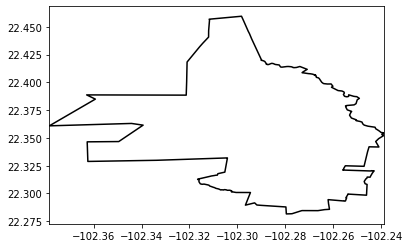

In [ ]:
shape_ex=sf.shape(3)
x_lon = np.zeros((len(shape_ex.points),1))
y_lat = np.zeros((len(shape_ex.points),1))
for ip in range(len(shape_ex.points)):
    x_lon[ip] = shape_ex.points[ip][0]
    y_lat[ip] = shape_ex.points[ip][1]

#And then I plot it:

plt.plot(x_lon,y_lat,'k')

# use bbox (bounding box) to set plot limits
plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])

In [ ]:
print(shape_ex.parts)

[0]


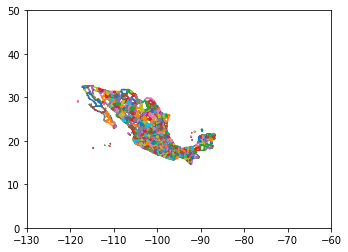

In [ ]:
plt.figure()
ax = plt.axes() # add the axes
ax.set_aspect('equal')

for shape in list(sf.iterShapes()):
    npoints=len(shape.points) # total points
    nparts = len(shape.parts) # total parts

    if nparts == 1:
        x_lon = np.zeros((len(shape.points),1))
        y_lat = np.zeros((len(shape.points),1))
        for ip in range(len(shape.points)):
            x_lon[ip] = shape.points[ip][0]
            y_lat[ip] = shape.points[ip][1]
        plt.plot(x_lon,y_lat)

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
               i1 = shape.parts[ip+1]-1
            else:
               i1 = npoints

            seg=shape.points[i0:i1+1]
            x_lon = np.zeros((len(seg),1))
            y_lat = np.zeros((len(seg),1))
            for ip in range(len(seg)):
                x_lon[ip] = seg[ip][0]
                y_lat[ip] = seg[ip][1]

            plt.plot(x_lon,y_lat)

plt.xlim(-130,-60)
plt.ylim(0,50)
plt.show()

In [ ]:
#transform to a geojson file for easier manipulation
#shp_file=geopandas.read_file('./mun20gw.shp')
shp_file=geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/mun20gw/mun20gw.shp")
shp_file.to_file('municipalities.geojson', driver='GeoJSON')

In [ ]:
#geojson file for municipalities
mun_df= geopandas.read_file('municip.geojson')
#mun_df= geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/mun20gw/municip.geojson')
#mun_df=geopandas.read_file('./mun20gw.shp') 

In [ ]:
#map the municipalities 
mun_df.plot()

In [ ]:
#import and merge consumption csv
mun_df.head()


,CVEGEO,CVE_ENT,CVE_MUN,NOM_ENT,NOM_MUN,Area,PERIMETER,COV_,COV_ID,geometry
0,01001,01,001,Aguascalientes,Aguascalientes,116635.924759,256.631025,0,1,"POLYGON ((-102.10641 22.06035, -102.10368 22.0..."
1,01002,01,002,Aguascalientes,Asientos,54337.426603,192.096428,1,2,"POLYGON ((-102.05189 22.29144, -102.05121 22.2..."
2,01003,01,003,Aguascalientes,Calvillo,92335.783229,171.636168,2,3,"POLYGON ((-102.68569 22.09963, -102.69087 22.0..."
3,01004,01,004,Aguascalientes,CosÃ­o,12838.354454,73.352682,3,4,"POLYGON ((-102.28787 22.41649, -102.28753 22.4..."
4,01005,01,005,Aguascalientes,JesÃºs MarÃ­a,49989.509158,163.500810,4,5,"POLYGON ((-102.33568 22.05067, -102.33348 22.0..."


In [ ]:
demand_df=pd.read_csv('./demand.csv')
#demand_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/demand.csv')

In [ ]:
#demand and map datasets have difeerent shapes , assign the corresponding values to each municipio and use average for NaN 

#set index to geo code and then order by ascending value 
mun_df["CVEGEO"]=mun_df["CVEGEO"].astype(int)
mun_df["CVEGEO"].dtypes
mun_df.set_index("CVEGEO",inplace=True)
mun_df.sort_index(ascending=True,inplace=True)
key_df= demand_df.set_index("key")[["municipio","mean_consum_kwh","population","demand"]]
#key_df.head()
#mun_df.head()
#municip_demand=demand_df[["municipio","mean_consum_kwh","population","demand"]]


In [ ]:
#join dataframes and fill na values with avg values 
merged= mun_df.join(key_df,how="left")
#merged.tail()
#merged.isna().sum()
kwh_avg=merged["mean_consum_kwh"].mean()
pop_avg=merged["population"].mean()
demand_avg=merged["demand"].mean()
merged["mean_consum_kwh"].fillna(kwh_avg,inplace=True)
merged["population"].fillna(pop_avg,inplace=True)
merged["demand"].fillna(demand_avg,inplace=True)


In [ ]:
merged.isna().sum()

CVE_ENT             0
CVE_MUN             0
NOM_ENT             0
NOM_MUN             0
Area                0
PERIMETER           0
COV_                0
COV_ID              0
geometry            0
municipio          11
mean_consum_kwh     0
population          0
demand              0
dtype: int64

In [ ]:
merged.head()
merged.describe()
merged.to_csv("./municipalities_geocoded.csv")

In [ ]:
#values missing from original consumption csv , replaced with column averages
df1 = merged[merged.isna().any(axis=1)]
df1.head(11)

,CVE_ENT,CVE_MUN,NOM_ENT,NOM_MUN,Area,PERIMETER,COV_,COV_ID,geometry,municipio,mean_consum_kwh,population,demand
CVEGEO,,,,,,,,,,,,,
2006,02,006,Baja California,San QuintÃ­n,3.418555e+06,1904.764048,2468,2469,"MULTIPOLYGON (((-112.30067 28.38702, -112.2982...",NaN,2.711084e+06,51163.243287,66.377085
4012,04,012,Campeche,Seybaplaya,2.823680e+04,108.561856,2409,2410,"POLYGON ((-90.61466 19.71672, -90.61771 19.695...",NaN,2.711084e+06,51163.243287,66.377085
7120,07,120,Chiapas,CapitÃ¡n Luis Ãngel Vidal,2.272494e+04,66.645571,101,102,"POLYGON ((-92.62299 15.62904, -92.62015 15.628...",NaN,2.711084e+06,51163.243287,66.377085
7121,07,121,Chiapas,RincÃ³n Chamula San Pedro,7.807806e+03,52.016026,130,131,"POLYGON ((-92.93462 17.25205, -92.92378 17.245...",NaN,2.711084e+06,51163.243287,66.377085
7122,07,122,Chiapas,El Parral,3.716183e+04,136.065711,131,132,"POLYGON ((-93.03161 16.43315, -93.02967 16.430...",NaN,2.711084e+06,51163.243287,66.377085
7123,07,123,Chiapas,Emiliano Zapata,2.190612e+04,108.269472,132,133,"POLYGON ((-92.88679 16.58830, -92.88443 16.587...",NaN,2.711084e+06,51163.243287,66.377085
7124,07,124,Chiapas,Mezcalapa,7.475522e+04,203.983576,133,134,"POLYGON ((-93.52691 17.39660, -93.52694 17.395...",NaN,2.711084e+06,51163.243287,66.377085
7125,07,125,Chiapas,Honduras de la Sierra,2.692103e+04,88.092312,134,135,"POLYGON ((-92.38696 15.66492, -92.39006 15.660...",NaN,2.711084e+06,51163.243287,66.377085
17034,17,034,Morelos,Coatetelco,5.134837e+03,37.173216,864,865,"POLYGON ((-99.28814 18.78201, -99.28772 18.781...",NaN,2.711084e+06,51163.243287,66.377085


AttributeError: ignored

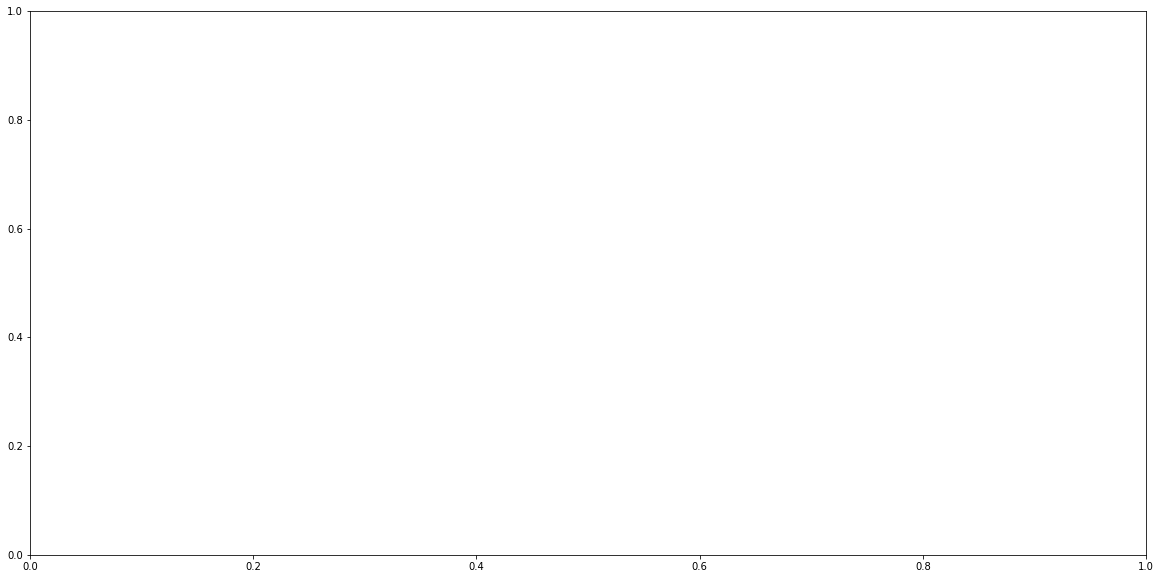

In [ ]:
#final map , just change diferent column values for the diferent 
merged= pd.read_csv("municipalities_geocoded.csv")
import matplotlib.pyplot as plt
column="mean_consum_kwh"
fig,ax = plt.subplots(figsize=(20,10))
vmax,vmin=merged[column ].max(),merged[column ].min()
merged.plot(column=column ,ax=ax,cmap="viridis",legend=True)


ax.set_title(column+" per municipality")
plt.show()

In [ ]:
import plotly.express as px

column="population"
fig2 = px.choropleth(test_merge,locations="CVEGEO",geojson=mun_df,color=column,color_continuous_scale="Viridis",range_color=(vmin, vmax),title=column+" by municipality",)
fig2.show()

NameError: ignored

In [ ]:
import folium
test_merge= merged[["CVEGEO","NOM_MUN","mean_consum_kwh","population","demand"]]

merged.to_json()

KeyError: ignored

In [ ]:
bins=list(test_merge["population"].quantile([0, 0.25, 0.5, 0.75, 1]))

m = folium.Map(location=[ 23.6345 , -102.5528], zoom_start=3)

folium.Choropleth(
    geo_data=mun_df,
    data=test_merge,
    columns=["NOM_MUN", "population"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Population by municipality",
    bins=bins,
    reset=True,
).add_to(m)

m

NameError: ignored

In [ ]:
while True:pass

KeyboardInterrupt: ignored

In [ ]:
m2 = folium.Map(location=[ 23.6345 , -102.5528], zoom_start=6)
#test_merge.head()

In [ ]:
df=pd.read_csv("municipalities_geocoded.csv")
df.head()